In [1]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import ktrain
from   ktrain import text
import pandas as pd
from   sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import colorama
from colorama import Fore, Back, Style

In [3]:
# load the logistic regression model
predictor_lgr = ktrain.load_predictor('/content/logistic_regresson')

In [4]:
# load the logistic distilbert model
predictor_dist = ktrain.load_predictor('/content/distilbert_model')

In [ ]:
# load the logistic bert model
# predictor_bert = ktrain.load_predictor('/content/bert')

In [5]:
# load the train.csv 
df = pd.read_csv('/content/train.csv')
df.head()

,text,sentiment
0,For a movie that gets no respect there sure ar...,0
1,Bizarre horror movie filled with famous faces ...,0
2,"A solid, if unremarkable film. Matthau, as Ein...",0
3,It's a strange feeling to sit alone in a theat...,0
4,"You probably all already know this by now, but...",0


In [12]:
# selected sentences for statisitcs compare between all models
selected_rows = df[12400:12600]
selected_text = selected_rows['text']
selected_sentiment = selected_rows['sentiment']
#selected_text ,selected_sentiment

(12400    This film is a quite entertaining horror antho...
 12401    one of the funnest mario's i've ever played. t...
 12402    Indian Summer! It was very nostalgic for me. I...
 12403    I'd just like to say that i've seen this film ...
 12404    This film is an absolute classic for camp. Tha...
                                ...                        
 12595    This horrendously bad piece of trash manages t...
 12596    The monster from Enemy Mine somehow made his w...
 12597      I am a big-time horror/sci-fi fan regardless...
 12598    what kind of sh*t is this? Power rangers vs Fr...
 12599    Because others have gone to the trouble of sum...
 Name: text, Length: 200, dtype: object,
 12400    0
 12401    0
 12402    0
 12403    0
 12404    0
         ..
 12595    1
 12596    1
 12597    1
 12598    1
 12599    1
 Name: sentiment, Length: 200, dtype: int64)

In [13]:
max(selected_sentiment) , min(selected_sentiment)

(1, 0)

In [14]:
selected_sentiment.value_counts()

0    100
1    100
Name: sentiment, dtype: int64

In [7]:
data = [ 'This movie was horrible! The plot was boring. Acting was okay, though.',
         'The film really sucked. I want my money back.',
        'What a beautiful romantic comedy. 10/10 would see again!']

In [8]:
y_pred_lgr = predictor_lgr.predict(data, verbose=0)

In [9]:
y_pred_dist = predictor_dist.predict(data, verbose=0)

In [15]:
# make predictions for selected sentences 
y_pred_lgr = predictor_lgr.predict(selected_text.tolist(), verbose=0)
#y_pred_bert = predictor_bert.predict(selected_text.tolist(), verbose=0)

In [16]:
y_pred_dist = predictor_dist.predict(selected_text.tolist(), verbose=0)

In [17]:
mapping = {'not_sentiment':0 , 'sentiment':1}
y_pred_lgr_d = list(mapping[val] for val in y_pred_lgr )
y_pred_dist_d = list(mapping[val] for val in y_pred_dist )
#y_pred_d = list(mapping[val] for val in y_pred )


In [52]:
# print classification reports for all models 
report = classification_report(selected_sentiment,y_pred_dist_d)
print('Classification report for distilbert_model')
print(report ,'\n')
report = classification_report(selected_sentiment,y_pred_lgr_d)
print('Classification report for logistic_regresson model')
print(report,'\n')
#report = classification_report(selected_sentiment,y_pred_bert)
#print('Classification report for bert_model')
#print(report)

Classification report for distilbert_model
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       100
           1       0.97      0.97      0.97       100

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200
 

Classification report for logistic_regresson model
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       100
           1       0.83      0.88      0.85       100

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200
 



<Axes: title={'center': 'Confusion matrix for Logistic Regression Model'}>

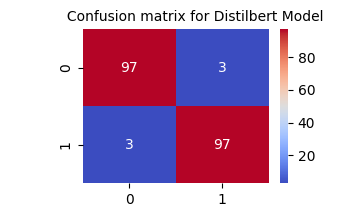

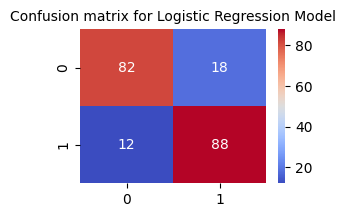

In [45]:
# display confution matrix 
cfg_dist = confusion_matrix(selected_sentiment , y_pred_dist_d)
plt.figure(1 , figsize = (3,2))
plt.title('             Confusion matrix for Distilbert Model    ' , fontsize = 10)
sns.heatmap(cfg_dist , annot = True , cmap = 'coolwarm') 
cfg_lgr = confusion_matrix(selected_sentiment , y_pred_lgr_d)
plt.figure(2 , figsize = (3,2))
plt.title('Confusion matrix for Logistic Regression Model' , fontsize = 10)
sns.heatmap(cfg_lgr , annot = True , cmap = 'coolwarm') 
#cfg_bert = confusion_matrix(selected_sentiment , y_pred_bert)
#sns.heatmap(cfg_bert , annot = True , cmap = 'coolwarm') 

In [74]:
print('Print Some samples sentances for all predictors:\n')
for i in data:
  print(i , '\n')
  prediction = predictor_lgr.predict(i)
  print('logistic regressor prediction : ' ,Fore.WHITE + Back.GREEN + prediction + Style.RESET_ALL)
  prediction = predictor_dist.predict(i)
  print('Distilbert prediction : ' ,Fore.WHITE + Back.GREEN + prediction + Style.RESET_ALL, '\n')



Print Some samples sentances for all predictors:

This movie was horrible! The plot was boring. Acting was okay, though. 

logistic regressor prediction :  sentiment
Distilbert prediction :  sentiment 

The film really sucked. I want my money back. 

logistic regressor prediction :  sentiment
Distilbert prediction :  sentiment 

What a beautiful romantic comedy. 10/10 would see again! 

logistic regressor prediction :  not_sentiment
Distilbert prediction :  not_sentiment 



In [75]:
print('Now the user should add a test sentence')
print('This sentence will be predicted on all 3 modles')
print('Enter q to stop the loop')
while(True):
  user_input = input("\nEnter sentance to be eveluated: \n\n")
  if user_input == 'q':
    break
  else:
    prediction_lgr = predictor_lgr.predict(user_input)
    print('Logistic Regerassion Predictions : ' , Fore.WHITE + Back.GREEN + prediction_lgr + Style.RESET_ALL)
    prediction_dist = predictor_dist.predict(user_input)
    print('Distildibert Predictions : ' ,Fore.WHITE + Back.GREEN + prediction_dist + Style.RESET_ALL)
    

Now the user should add a test sentence
This sentence will be predicted on all 3 modles
Enter q to stop the loop

Enter sentance to be eveluated: 

This movie was horrible! The plot was boring. Acting was okay, though
Logistic Regerassion Predictions :  sentiment
Distildibert Predictions :  sentiment

Enter sentance to be eveluated: 

I am going to sleep
Logistic Regerassion Predictions :  sentiment
Distildibert Predictions :  sentiment

Enter sentance to be eveluated: 

My name is Ilan 
Logistic Regerassion Predictions :  not_sentiment
Distildibert Predictions :  not_sentiment

Enter sentance to be eveluated: 

q
